# Who Owns America?

A look at which institutions own the most publicly traded American corporations on the S&P500 (Standard & Poors 500 Index).

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import yfinance as yf

from tqdm.auto import tqdm

In [6]:
ticker = 'AAPL'
stock = yf.Ticker(ticker)
stock.institutional_holders

Holder      Shares Date Reported   % Out  \
0     Vanguard Group, Inc. (The)  1272378901    2022-09-29  0.0800   
1                 Blackrock Inc.  1020245185    2022-09-29  0.0641   
2        Berkshire Hathaway, Inc   894802319    2022-09-29  0.0562   
3       State Street Corporation   591543874    2022-09-29  0.0372   
4                       FMR, LLC   350900116    2022-09-29  0.0221   
5  Geode Capital Management, LLC   279758518    2022-09-29  0.0176   
6  Price (T.Rowe) Associates Inc   224863541    2022-09-29  0.0141   
7                 Morgan Stanley   182728771    2022-09-29  0.0115   
8     Northern Trust Corporation   176084862    2022-09-29  0.0111   
9    Bank of America Corporation   142260591    2022-09-29  0.0089   

          Value  
0  164913030135  
1  132233979050  
2  115975329111  
3   76670001870  
4   45480164248  
5   36259501688  
6   29144563686  
7   23683476120  
8   22822359071  
9   18438395286

In [7]:
# Grab Ticker symbols for each stock on the S&P500
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies?oldformat=true')[0]['Symbol'].values

In [8]:
# Track which tickers recieve errors for later diagnosis
error_list = []

# 

df_institutions = []

# Loop through all tickers grabbing the relevant data
for ticker in tqdm(tickers):
    try:
        stock = yf.Ticker(ticker)
        df_institution = stock.institutional_holders
        df_institution['Target'] = stock.ticker
        df_institutions.append(df_institution)
    except:
        error_list.append(ticker)

df_edges = pd.concat(df_institutions)

100%|██████████| 503/503 [1:23:42<00:00,  9.98s/it]


In [31]:
# Save Edgelist as CSV for further analysis in Gephi
df_edges.drop(columns=[0,1]).dropna().to_csv('SP500_inst_edges.csv')

In [49]:
G = nx.from_pandas_edgelist(df_edges.drop(columns=[0,1]).dropna(), 'Holder', 'Target')
pos = nx.spring_layout(G, scale=10)

In [44]:
colors = []
for node in G:
    if node in df_edges['Target'].values:
        colors.append('Red')
    else:
        colors.append('Yellow')

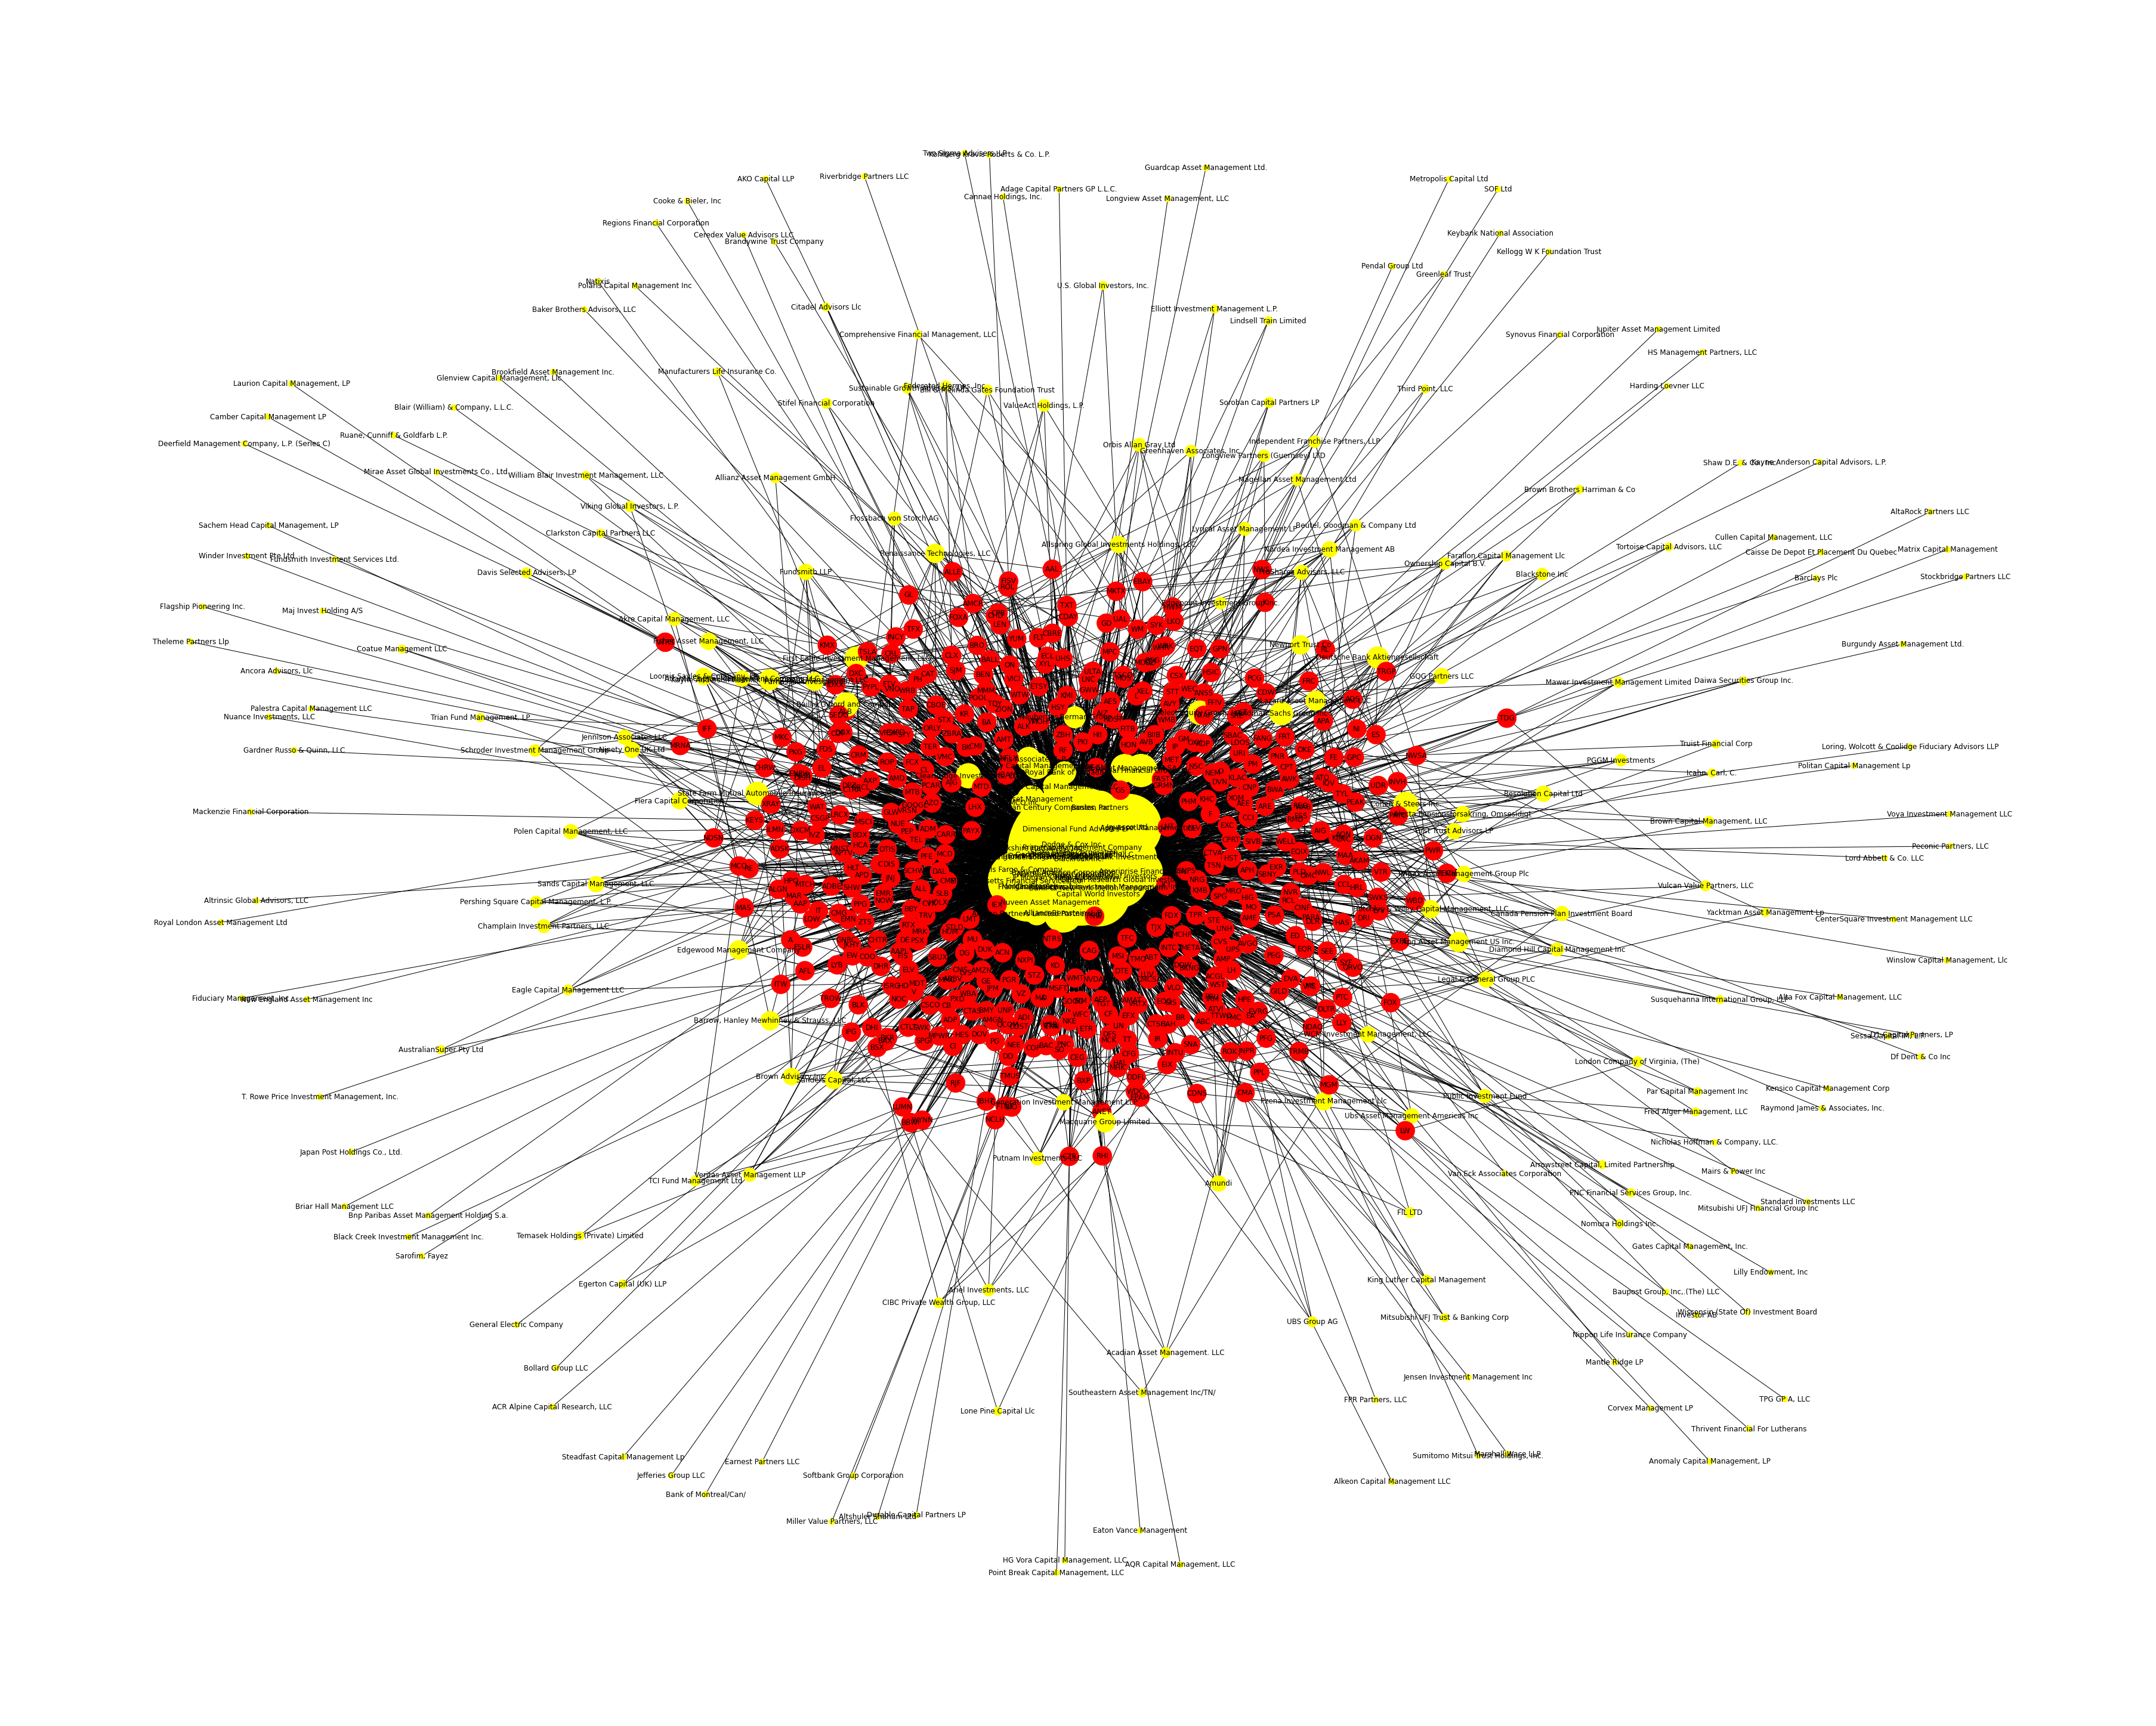

In [50]:
plt.figure(figsize=(50,40))
nx.draw(G, pos, with_labels = True, node_color = colors, node_size = [v * 100 for v in dict(G.degree()).values()])

Have a look at the Network Graph made in Gephi for a network without overlapping nodes and text.